In [1]:
import networkx as nx
from dowhy import gcm

/data/shurui.gui/mambaforge/envs/cladder/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PCM = gcm.ProbabilisticCausalModel(nx.DiGraph([('X', 'Y'), ('V', 'Y')]))

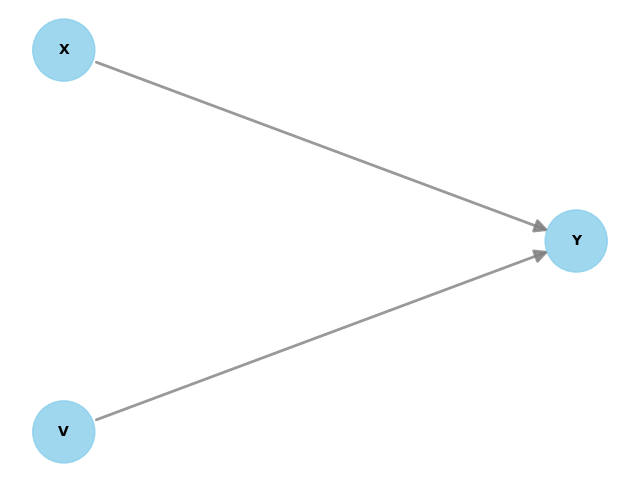

NetworkXError: The sets are not disjoint, with intersection {'Y'}

In [6]:
import dowhy
from dowhy import CausalModel
import networkx as nx
import numpy as np
import pandas as pd

# Define your causal graph
causal_graph = nx.DiGraph()
causal_graph.add_edges_from([("X", "Y"), ("V", "Y")])

# Create a synthetic dataset with predefined probabilities
np.random.seed(42)
data = pd.DataFrame({
    "X": np.random.binomial(1, 0.6, 1000),  # Bernoulli X ~ Bernoulli(0.6)
    "V": np.random.binomial(1, 0.5, 1000),  # Bernoulli V ~ Bernoulli(0.5)
})
# Define Y based on P(Y|X,V) as Bernoulli(p), where p = 0.7 if X and V both equal 1, otherwise 0.3
data["Y"] = data.apply(lambda row: np.random.binomial(1, 0.7) if row["X"] == 1 and row["V"] == 1 else np.random.binomial(1, 0.3), axis=1)

# Instantiate and visualize the causal model
model = CausalModel(
    data=data,
    treatment="Y",
    outcome="Y",
    graph=causal_graph
)
model.view_model()

# Now intervene with do(Y=1)
intervened_data = data.copy()
intervened_data["Y"] = 1  # Manually setting Y to 1 as intervention

# Use dowhy to estimate causal effect after intervention
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1
)
print("Estimated Causal Effect after intervention:", estimate.value)